In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

from matplotlib.ticker import MaxNLocator
from sklearn.utils import check_random_state
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.gridspec import GridSpec


from itertools import product

fig_dir = './figures/toy_data_ex/'
os.makedirs(fig_dir, exist_ok=True)

In [2]:
def joint_means(K):
    return np.array([(k, k) for k in range(K)])
    
def get_block_means(R, C, missing_last=False):
    means = [(r, c) for (r, c) in product(range(R), range(C))]
    if missing_last:
        means = means[:-1]
    return np.array(means)
    
    
def concat_means(means):
    new_means = []

    vert_offset = 1
    horiz_offset = 1
    for i in range(len(means)):
        
        new_mean = means[i] + np.array([horiz_offset, vert_offset])
        new_means.append(new_mean)
        
        horiz_offset += len(np.unique(means[i][:, 0]))
        vert_offset += len(np.unique(means[i][:, 1]))
        
    return np.vstack(new_means)


def get_pi(means):
    Pi = np.zeros((means[:, 1].max(),
                   means[:, 0].max()))
    for k1, k2 in means:
        # Pi[k2 - 1, -k1] = 1
        Pi[-k2, k1 - 1] = 1
    Pi = Pi.astype(bool)
    
    Pi = pd.DataFrame(Pi)
    Pi.index = np.arange(1, Pi.shape[0] + 1)[::-1]
    Pi.columns = np.arange(1, Pi.shape[1] + 1)
    
    return Pi



def get_samples(means, n_samples, std=0.2, random_state=None):
    
    rng = check_random_state(random_state)
    data = []
    for mean in means:
        X = rng.normal(size=(n_samples, 2), scale=std)
        X += mean
        data.append(X)
        
    return np.vstack(data)


def make_plot_2d(means, X=None, n_samples=100, std=0.1,
                 s=100, lw=3, pt_s=5, plot_means=True,
                 markers=None):
    

    if plot_means:
        for mean in means:
            plt.scatter(mean[0], mean[1],
                        marker='x', c='red',
                        s=s, lw=lw)

            
    if X is not None:
        if markers is None:
            plt.scatter(X[:, 0], X[:, 1],
                        c='black', s=pt_s, alpha=.5,
                        zorder=0)
        else:
            for i in range(X.shape[0]):
                plt.scatter(X[i, 0], X[i, 1],
                            c='black', s=pt_s, alpha=.5,
                            zorder=0, marker=markers[i])


    plt.xlabel('View 1')
    plt.ylabel('View 2')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
def plot_pi(Pi):
    sns.heatmap(Pi, mask=~(Pi > 0), cbar=False, square=True, linewidths=.5, cmap='Greys', vmin=0)
    # add_ticks(Pi)
    plt.xlabel("View 1 clusters")
    plt.ylabel("View 2 clusters")

def add_ticks(mat):
    
    n_rows, n_cols = mat.shape
    x_ticks = np.arange(1, n_cols + 1)
    plt.xticks(x_ticks)

    y_ticks = np.arange(1, n_rows + 1)[::-1]
    plt.yticks(y_ticks)
    
    

def permute_pi(Pi, random_state=None):
    rng = check_random_state(random_state)
    return Pi.iloc[rng.permutation(Pi.shape[0]), :].iloc[:, rng.permutation(Pi.shape[1])]

def permute_meants(means, random_state=None):
    rng = check_random_state(random_state)
    K = means.shape[0]
    return np.vstack([means[rng.permutation(K), 0], means[rng.permutation(K), 1]]).T



def make_plot_1d(means, x=None, n_samples=100, std=0.1,
                 s=100, lw=1, pt_s=20, plot_means=True,
                 markers=None):

    if plot_means:
        plt.scatter(means, np.zeros_like(means),
                    marker='x', c='red',
                    s=s, lw=lw)

            
        
    if x is not None:
        y = np.zeros_like(x)
        height = .001
        y = np.random.uniform(-height, height, size=len(x))
        if markers is None:
            
            plt.scatter(x, y,
                        c='black', s=pt_s, alpha=.5,
                        zorder=0)
        else:
            for i in range(len(x)):
                
                plt.scatter(x[i], y[i],
                            c='black', s=pt_s, alpha=.5,
                            marker=markers[i],
                            zorder=0)


    # plt.xlabel('view 1')
    ax = plt.gca()
    ax.set_xticks(means)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.axhline(color='black', lw=1, alpha=.5)
    

    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax.get_yaxis().set_visible(False)

    


def set_axis_view_colors(view_colors):
    ax = plt.gca()
    
    ax.tick_params(axis='x', colors=view_colors[0])
    ax.xaxis.label.set_color(view_colors[0])
    
    ax.tick_params(axis='y', colors=view_colors[1])
    ax.yaxis.label.set_color(view_colors[1])

# view data

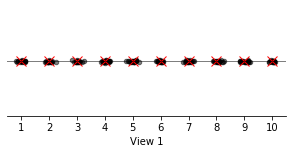

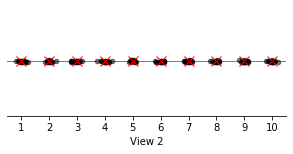

In [3]:
means = 1 + joint_means(10)
X = get_samples(means, n_samples=20, std=0.1, random_state=10)

plt.figure(figsize=(5, 2))
make_plot_1d(means=means[:, 0], x=X[:, 0])
plt.xlim(.5, 10.5)
plt.xlabel("View 1")
plt.savefig(fig_dir + 'view_1_marginal_data.png', bbox_inches='tight', dpi=100)


plt.figure(figsize=(5, 2))
make_plot_1d(means=means[:, 1], x=X[:, 1])
plt.xlim(.5, 10.5)
plt.xlabel("View 2")
plt.savefig(fig_dir + 'view_2_marginal_data.png', bbox_inches='tight', dpi=100)


In [4]:
view_colors = ['blue', 'orange']
# tranparent = True


font_size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 8),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size*0.75,
          'ytick.labelsize': font_size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

pt_s = 20

dpi = 200

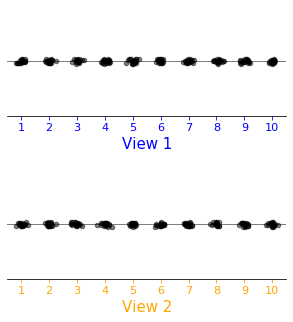

In [5]:
n_samples = 20


means = 1 + joint_means(10)
X = get_samples(means, n_samples=n_samples, std=0.1, random_state=10)
gs = GridSpec(2, 1, hspace=.5)

plt.figure(figsize=(5, 5))

plt.subplot(gs[0, 0])

# markers = ['x'] * n_samples + ['.'] * n_samples * (10 - 1)
#markers = np.repeat('.', n_samples * 10)
#markers[0:n_samples] = 'x'

make_plot_1d(means=means[:, 0], x=X[:, 0], plot_means=False,  pt_s=pt_s)
plt.xlim(.5, 10.5)
plt.xlabel("View 1", color='blue')

# plt.annotate('View 1 cluster 1', xy=(1.3, .0025), xytext=(1, .02),
#              c=view_colors[0], fontsize=font_size,
#              arrowprops=dict(color=view_colors[0], arrowstyle="->"))
plt.gca().tick_params(axis='x', colors=view_colors[0])
# plt.scatter(1, 0, marker='x', color=view_colors[0], s=300, lw=2)

plt.subplot(gs[1, 0])

markers = np.repeat('.', n_samples * 10)
markers[0:5] = 'x'


make_plot_1d(x=X[:, 1], means=means[:, 1], plot_means=False,  pt_s=pt_s)
plt.xlim(.5, 10.5)
plt.xlabel("View 2", color=view_colors[1])
# plt.annotate('View 2 cluster 1', xy=(1.3, .0025), xytext=(1, .02),
#              c=view_colors[1], fontsize=font_size,
#              arrowprops=dict(color=view_colors[1], arrowstyle="->"))
plt.gca().tick_params(axis='x', colors=view_colors[1])
# plt.scatter(1, 0, marker='x', color=view_colors[1], s=300, lw=2)
plt.savefig(fig_dir + 'view_marginal_data.png', bbox_inches='tight', dpi=dpi)


# independent

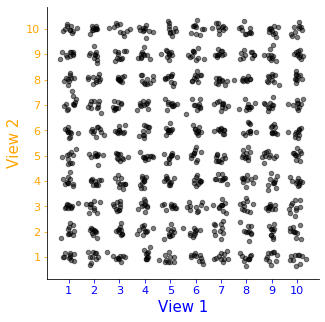

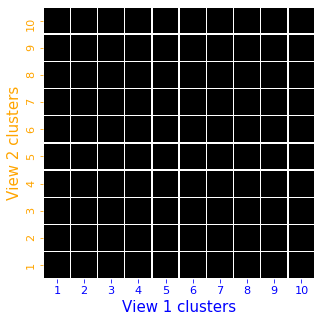

In [6]:
name = 'indep'



means = 1 + get_block_means(10, 10)

n_clust = means.shape[0]

# markers = ['x'] * n_samples * 10 + ['.'] * n_samples * (n_clust - 10)
# markers = np.array(['.'] * n_samples * n_clust)
# markers[0:(n_samples * 10)] = 'x'
# for i in range(10):
#     L = i * 10 * n_samples
#     R = L + n_samples
#     markers[L:R] = 'x'


Pi = get_pi(means)
X = get_samples(means, n_samples=10, std=0.15, random_state=10)

plt.figure(figsize=(5, 5))
make_plot_2d(means=means, X=X, plot_means=False, pt_s=pt_s)
plt.axis('scaled')
add_ticks(Pi)
set_axis_view_colors(view_colors)

# rect = Rectangle(xy=(.5, .5), width=10, height=1, linewidth=1,
#                  edgecolor=view_colors[1], facecolor='none')
# plt.gca().add_patch(rect)

# rect = Rectangle(xy=(.5, .5), width=1, height=10, linewidth=1,
#                  edgecolor=view_colors[0], facecolor='none')
# plt.gca().add_patch(rect)
# plt.gca().get_xticklabels()[0].set_weight("bold")
# plt.gca().get_yticklabels()[-1].set_weight("bold")


# plt.axvline(1, color=view_colors[0], alpha=.8)
# plt.axhline(1, color=view_colors[1], alpha=.8)

plt.savefig(fig_dir + '{}_data.png'.format(name), bbox_inches='tight', dpi=dpi)



# plot pi
plt.figure(figsize=(5, 5))
plot_pi(Pi)
set_axis_view_colors(view_colors)
plt.savefig(fig_dir + '{}_pi.png'.format(name), bbox_inches='tight', dpi=dpi)


# partial dependence

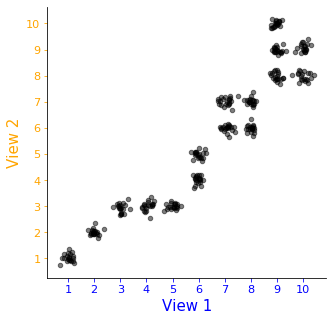

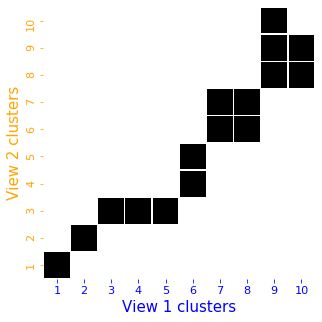

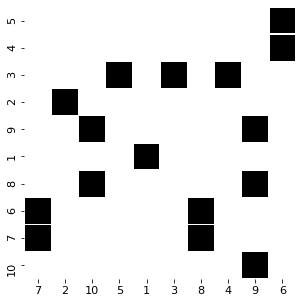

In [7]:
name = 'partial_dependence'
means = concat_means([joint_means(2),
                      get_block_means(3, 1),
                      get_block_means(1, 2),
                      get_block_means(2, 2),
                      get_block_means(2, 3, missing_last=True)])

Pi = get_pi(means)
X = get_samples(means, n_samples=20, std=0.15, random_state=10)

# plot data
plt.figure(figsize=(5, 5))
make_plot_2d(means=means, X=X, plot_means=False, pt_s=pt_s)
plt.axis('scaled');
add_ticks(Pi)
set_axis_view_colors(view_colors)

# plt.axvline(1, color=view_colors[0], alpha=.8)
# plt.axhline(1, color=view_colors[1], alpha=.8)
plt.savefig(fig_dir + '{}_data.png'.format(name), bbox_inches='tight', dpi=dpi)


# plot pi
plt.figure(figsize=(5, 5))
plot_pi(Pi)
set_axis_view_colors(view_colors)
plt.savefig(fig_dir + '{}_pi.png'.format(name), bbox_inches='tight', dpi=dpi)




# plot pi perm
# means_perm = permute_meants(means, random_state=6) # 13
# Pi_perm = get_pi(means_perm)
Pi_perm = permute_pi(Pi, random_state=41)
plt.figure(figsize=(5, 5))
plot_pi(Pi_perm)
plt.xlabel('')
plt.ylabel('')
# set_axis_view_colors(view_colors)
plt.savefig(fig_dir + '{}_pi_perm.png'.format(name), bbox_inches='tight', dpi=dpi)


# fully joint

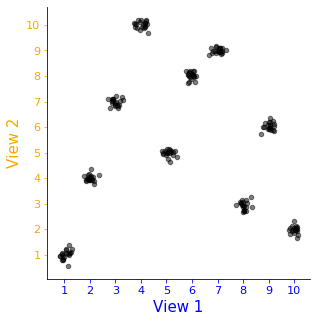

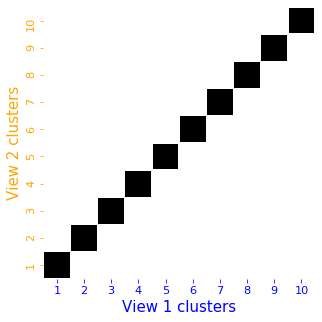

In [8]:
name = 'fully_joint'
means = concat_means([joint_means(10)])
Pi = get_pi(means)

perm_means = permute_meants(means, random_state=6) # 13

X = get_samples(perm_means, n_samples=20, std=0.15, random_state=10)

# plot data
plt.figure(figsize=(5, 5))
make_plot_2d(means=perm_means, X=X, plot_means=False, pt_s=pt_s)
plt.axis('scaled');
add_ticks(Pi)
set_axis_view_colors(view_colors)

# plt.axvline(1, color=view_colors[0], alpha=.8)
# plt.axhline(1, color=view_colors[1], alpha=.8)

plt.savefig(fig_dir + '{}_data.png'.format(name), bbox_inches='tight', dpi=dpi)


# plot pi
plt.figure(figsize=(5, 5))
plot_pi(Pi)
set_axis_view_colors(view_colors)
plt.savefig(fig_dir + '{}_pi.png'.format(name), bbox_inches='tight', dpi=dpi)
